## **Understand and Implementation of ``BOOTSTRAP`` Simulation** 

In [1]:
import os
import sys
import logging

logging.basicConfig(filename="Resampling_and_Bootstrapping.log",
                    filemode='w',
                    level=logging.INFO,
                    format="%(asctime)s : %(levelname)s : %(message)s")

try :
    logging.info("#### Start packages import ####")
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import sklearn
except ModuleNotFoundError as import_error:
    logging.error(msg=(import_error.__class__.__name__ + " :: {} not found".format(import_error.name)))

%matplotlib inline

### **Population Dataset**

In [35]:
np.random.seed(44)
pop_scores = np.random.randint(low=0,high=400,size=500,dtype=np.int)

In [36]:
pop_scores

array([276, 241, 173,  59, 387,  96,  84, 387, 239, 120, 151, 311, 195,
       199,  67, 227, 109, 245, 100,  57, 257,  14, 120, 359, 349, 213,
       339,  96, 330, 287,  72, 189,  72, 330,  86, 378, 242, 144, 116,
       328,  50,  18,  92, 285,   1,  63, 140, 386,  66, 312, 305,   8,
       233, 164,  34,  10, 379, 116, 119,  53,  21, 306, 315, 373, 209,
       123, 235, 255, 399, 220, 104, 249,  40,  74, 352, 249, 227,  62,
       101,  25,  21, 384,  72,  42, 132, 334, 354, 255, 121,  31, 247,
        22, 141, 222, 178, 197, 272,   4, 267, 296, 347,  40, 164, 194,
       210, 353, 234, 374, 158, 188, 334, 121,  99, 147,  75, 332, 167,
       389, 177, 346, 126,  29, 180, 198, 184, 312,   0, 229, 327, 271,
       315, 297, 177, 305, 311, 385, 112, 368, 198,  89, 214, 138, 180,
        80,  53, 100, 226, 260,  89, 215, 127, 138, 199,  99, 118, 248,
       128, 150,  26, 170, 379,  70, 255,  31,  31, 371, 200,  10, 373,
       209, 364, 130, 357,  27, 148, 104, 337, 362, 340, 123, 12

In [37]:
## Population Score mean
np.mean(pop_scores)

201.02

In [38]:
## Population Score Variance
np.var(pop_scores,ddof=0)

14494.1916

In [39]:
## Population Score Std Dev
np.std(pop_scores,ddof=0)

120.39182530388017

### **Sample-1 from Population**

In [40]:
sample1 = np.random.choice(a=pop_scores,size=50,replace=True)

In [59]:
## Parent Sample Scores Mean
np.mean(sample1)

191.86

In [42]:
## Parent Sample Score Var
np.var(sample1,ddof=1)

16738.898367346937

In [43]:
## Parent Sample Score Std Dev
samp1_std = np.std(sample1,ddof=1)
samp1_std

129.37889459779342

In [44]:
## Standard Error
samp1_std_err = samp1_std / (np.sqrt(40))
samp1_std_err

20.456599404194076

### **Here, the point estimate(usually referred as sample mean) is 192 and the standard error is 20. Therefore, we are saying that the population mean will lie in the interval (172,212).**

### **BOOTSTRAPPING Simulation**

In [63]:
bootsample_means = []
for _ in range(10000):
    bootsample = np.random.choice(a=sample1,size=40,replace=True)
    bootsample_means.append(np.mean(bootsample))

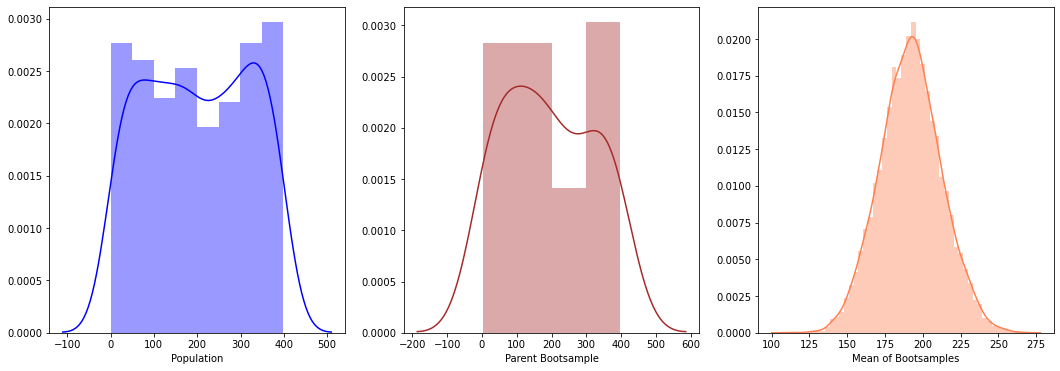

In [64]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    sns.distplot(pop_scores,ax=ax[0],axlabel='Population',color='blue')
    sns.distplot(sample1,ax=ax[1],axlabel='Parent Bootsample',color='brown')
    sns.distplot(bootsample_means,ax=ax[2],axlabel='Mean of Bootsamples',color='coral')
    plt.show()

In [47]:
from statsmodels.graphics.gofplots import qqplot

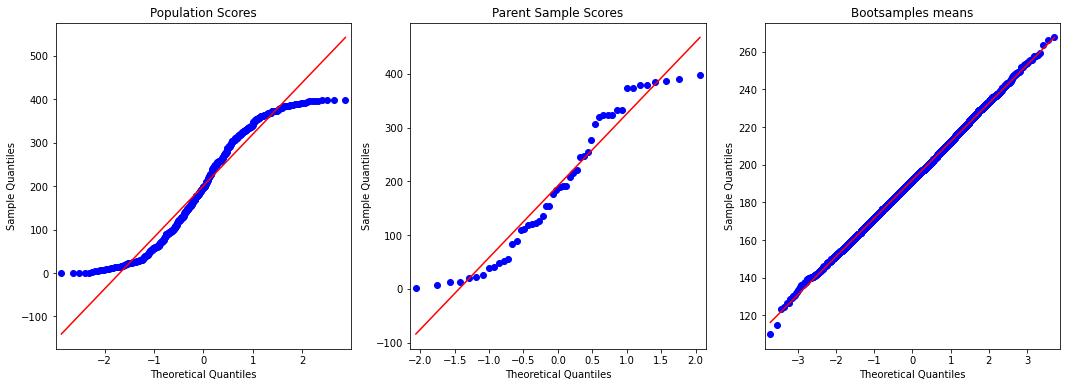

In [65]:
with plt.style.context('seaborn-bright'):
    fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(18,6))
    qqplot(data=np.array(pop_scores),line='r',ax=ax[0]);
    ax[0].set_title('Population Scores')
    
    qqplot(data=np.array(sample1),line='r',ax=ax[1]);
    ax[1].set_title('Parent Sample Scores')
    
    qqplot(data=np.array(bootsample_means),line='r',ax=ax[2]);
    ax[2].set_title('Bootsamples means')

### **Here, we saw that by using the computational power we can create a normally distributed data from a small size sample.**

In [66]:
## Mean of Bootsample means
np.mean(bootsample_means)

191.95997

In [67]:
## Std Dev of Bootsamples Means
np.std(bootsample_means)

20.326369679534515

In [68]:
## True Mean v/s Simulated Mean
np.mean(pop_scores), np.mean(bootsample_means)

(201.02, 191.95997)

In [69]:
## Theoretical Error v/s Simulated Std Error
np.std(pop_scores)/np.sqrt(40), np.std(bootsample_means)

(19.03561898126772, 20.326369679534515)

### **P-value**

In [71]:
len(list(filter(lambda val : val > np.mean(sample1), bootsample_means)))/10000

0.5025

### **This means that 50% of the times the value of Simulated Sample mean is greater than the parent sample mean.**